In [ ]:
# Assignment 2 Regression model
#Download temperature data from below link. https://www.kaggle.com/venky73/temperatures￾of-india?select=temperatures.csv
#This data consists of temperatures of INDIA averaging the temperatures of all places month
#wise. Temperatures values are recorded in CELSIUS
#a. Apply Linear Regression using suitable library function and predict the Month-wise
#b. Assessthe performance of regression models using MSE, MAE and R-Square metrics
#c. Visualize simple regression model.

# m = n * sum(x*y)- sum(x) * sum(y) /  n * sum(x^2) - (sum (x)) ^ 2

# c = sum(y)- m * sum(x) / n



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from operator import mul
import numpy as np
import os
os.getcwd()

'/content'

In [ ]:
def compute_regcoef(x,y):
    n = len(x)
    sumxy =  sum(list(map(mul,x,y)))
    num =  n* sumxy - sum(x) * sum(y)
    sumxx= sum(list(map(mul,x,x)))
    denom = n*sumxx - sum(x)*sum(x)
    m= num/denom
    c = ( sum(y) - m* sum(x))/n
    
    return(c,m)
    

In [ ]:
def plot_regline(x,y,b):
    plt.scatter(x,y,color='b',marker='o',s=30)
    # y = m*x + c 
    y_pred = np.float_(x)*b[1] + b[0]
    plt.plot(x,y_pred,color='g')
    plt.xlabel('X -Independent variable')
    plt.ylabel('Y-Dependent variable')
    plt.show()

intercept 0.0
slope 1.0


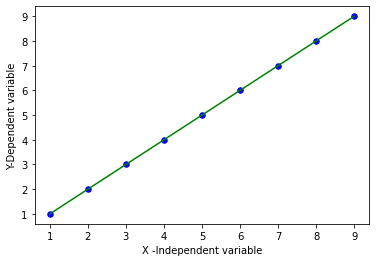

In [ ]:
x=[1,2,3,4,5,6,7,8,9]
y=[1,2,3,4,5,6,7,8,9]

b=compute_regcoef(x,y)
type(b)
print('intercept',b[0])
print('slope',b[1])
plot_regline(x,y,b)



In [ ]:
df = pd.read_csv('weight-height (1).csv')
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [ ]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

intercept [-350.73719181]
slope [7.71728764]


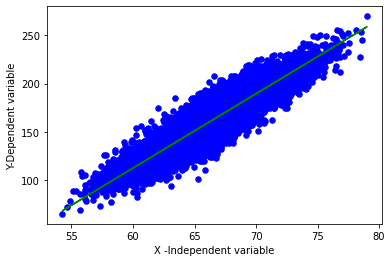

In [ ]:
X = df.iloc[:,1:2].values
y=  df.iloc[:,2].values

b=compute_regcoef(X,y)
print('intercept',b[0])
print('slope',b[1])
plot_regline(X,y,b)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
m= regression.coef_
print('regression coefficient or slope of regression line',m)

regression coefficient or slope of regression line [7.71833809]


In [ ]:
c= regression.intercept_
print('Intercept',c)

Intercept -350.8415809450646


In [ ]:
y_pred = regression.predict(X_test)
type(y_pred)

numpy.ndarray

In [ ]:
df1 = pd.DataFrame({'Actual':y_test.flatten(),'Predicted y ': y_pred.flatten()})

In [ ]:
df1


,Actual,Predicted y
0,138.085796,148.719182
1,187.363366,168.387776
2,216.533191,224.336476
3,131.761443,157.642640
4,157.718438,149.664097
...,...,...
2495,121.094631,149.597631
2496,207.493691,203.256212
2497,169.634399,177.055419
2498,169.459631,152.246924


In [ ]:
X_test[0]

array([64.72387669])

In [ ]:
predy0= 64.72387669 * m +c
predy0

array([148.7191818])

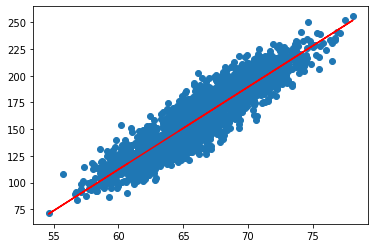

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='r')

In [ ]:
from sklearn import metrics
print('Mean Absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error 9.81509183752961
Mean squared error 151.46996027337104
Root Mean squared error 12.307313284115711
